## 1. Goals, Principles, and Patterns

### 1.1 Object-Oriented Design Goals

1. Robustness
    - Capable of handling unexpected inputs.
2. Adaptability
    - Capable of evolving over time in response to changing conditions in its environment
    - Portability:
        - the ability of software to run with minimal change on different hardware and operating system platforms
3. Reusability
    - the same code should be usable as a component of different systems in various applications.

### 1.2 Object-Oriented Design Principles

1. Modularity
    - Different components of a software system are divided into separate functional units
2. Abstraction
    - Distill a complicated system down to its most fundamental parts.
    - ADTs(Abstract Data Types)
        - Mathematical model of a data structure that specifies the type of data stored,the operations supported on them, and the types of parameters of the operations.
        - What operation does, not how it does.
     - Duck Typing
         - No compile time checking of data types
         - Assume that an object supports a set of known behaviors, with the interpreter raising a run-time error if those assumptions fail.
      - ABCs(Abstract Base Class)
          - Cannot be instantiated
          - Defines one or more common methods that all implementations of the abstraction must have.
          - An ABC is realized by one or more concrete classes that inherit from the abstract base class while providing implementations for those method declared by the ABC.
3. Encapsulation
    - Different components of a software system should not reveal the internal details of their respective implementations.
    - Implement the details of a component, without concern that other programmers will be writing code that intricately depends on them.

## 2. Software Development

### 2.1 Design

#### Divide the workings of program into classes

1. Responsibilities
    - Divide the work into different actors, each with a different responsibility.
2. Independence
    - Define the work for each class to be as independent from other classes as possible.
    - Subdivide responsibilites between classes so that each class has autonomy over some aspect of the program
3. Behavior
    - Define the behaviors for each class carefully and precisely, so the consequences of each action performed by a class will be well understood by other classes that interact with it.
  
  
#### CRC cards

Class-Responsibility-Collaborator cards:
    - index cards subdivide the work required of a program
    - Top: name of component
    - Left-side: responsibilities for this component
    - Right-side: collaborators for this component(the other component this component will interact with)
    
    
#### Class diagram

Class diagram is a type of UML(Unified Modeling Language) diagrams, that is used as a standard approach to explain and document.

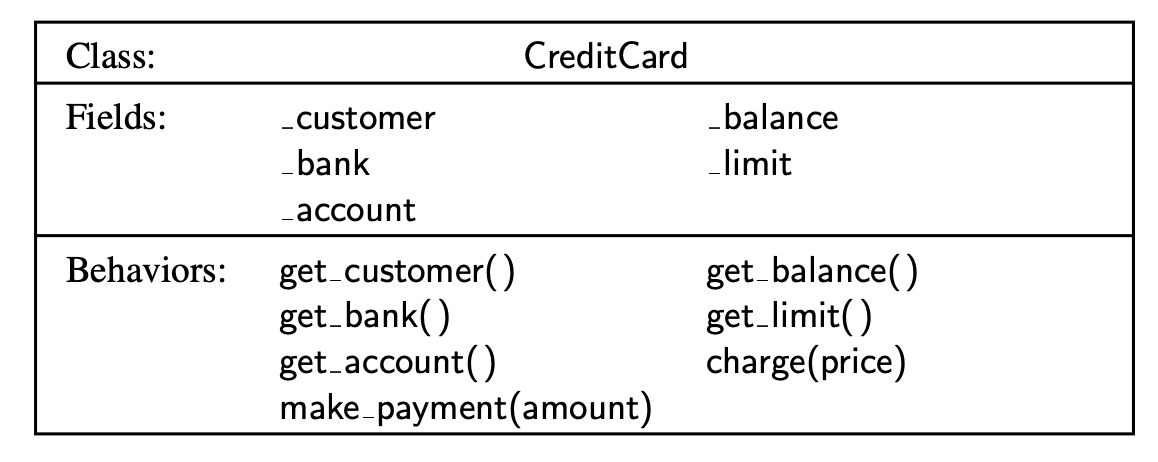


### 2.2 Pseudo-Code

    Intermediate step before the implementation of a design.
    Mixture of natural language and high-level programming constructs.
    
### 2.3 Coding Style and Documentation

#### Coding Principles:

1. Indented by 4 spaces not tab
2. Meaningful names for identifiers
    - Classes: singular noun, CamelCase
    - Functions:lowercase, separated by underscores, noun if only return a value
    - Individual object:lowercase noun
    - Constant identifiers: all capital letters with underscores
3. Comments

#### Documentation

docstring

In [1]:
def scale(data, factor):
    """
    Multiply all entries of numeric data list by the given factor.
    
    data:an instance of any mutable sequence type containing numeric elements
    
    factor: a number that serves as the multiplicative factor for scaling
    
    """
    for j in range(len(data)):
        data[j] *= factor

Docstring is stored as a field of the module, function or class in which it declared.<br>
<br>
Can be retrieved using help(x)

In [2]:
help(scale)

Help on function scale in module __main__:

scale(data, factor)
    Multiply all entries of numeric data list by the given factor.
    
    data:an instance of any mutable sequence type containing numeric elements
    
    factor: a number that serves as the multiplicative factor for scaling



### 2.4 Testing and Debugging

#### Testing

The process of experimentally checking the correctness of a program.
<br>
Aim at executing the program on a representative subset of inputs.
<br><br>
1. Method coverage:
    - Every method of a class is tested at least once
2. Statement coverage:
    - Every code statement in the program should be executed at least once
3. Special cases:(e.g. when testing a method that sorts a sequence of integers)
    - Sequence has no element
    - Sequence has one element
    - All elements are the same
    - Sequence already sorted
    - Sequence is reverse sorted
    
Type of testing:
    
- Unit testing:
       - the functionality of a specific component is tested in isolation of the larger software project.
       - the tested class does not depend upon any other classes
- Regression testing:
       - all previous tests are re-executed to ensure that changes to the software do not introduce new bugs in previous tested components
       
       
Automated testing:
    - When functions or classes are defined in a module, testing from that module can be embedded in the same file inside the "__main__" construct.
    
    
#### Debugging

The process of tracking the execution of a program and discovering the errors in it.

## 3 Class Definitions

### 3.1 CreditCard Class


In [3]:
class CreditCard:
    '''A consumer credit card'''
    def __init__(self, customer, bank, acnt, limit):
        '''Create a new credit card instance
        The initial balance is zero
        customer: the name of the customer,'John Bowman'
        bank:     the name of the bank, 'California Savings'
        acnt:     the acount identifier,'5391 0375 9387 5309'
        limit:    credit limt
        '''
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        return self._customer
    
    def get_bank(self):
        return self._bank
    
    def get_account(self):
        return self._account
    
    def get_limit(self):
        return self._limit
    
    def get_balance(self):
        return self._balance
    
    def charge(self, price):
        '''Charge given price to the card, assuming sufficient credit limit
        Return True if charge was processed, False if denied
        '''
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        '''Process customer payment that reduces balance'''
        self._balance -= amount

#### The self identifier

In [4]:
my_card = CreditCard('John Bowman','California Savings','5391 0375 9387 5309',3600)
my_card.get_balance()

0

When the user calls my_card.get_balance(), identifier **self**, within the definition of the get_balance() method, regers to method caller my_card.

#### Encapsulation

Nonpublic attributes: 
    - with single '_' 
    - e.g._customer
1. Users of a class should not directly access such attributes
2. As a general rule, we will treat all data members as nonpublic. We can provide accessors, such as get_balance to provide a user of read-only access to a trait.
3. We can also provide update method to change the state of nonpublic attributes.

#### Testing the class

In [5]:
## if __name__ = '__main__':
wallet = []
wallet.append(CreditCard('John Bowman','California Savings','5391 0375 9387 5309',2500))
wallet.append(CreditCard('John Bowman','California Federal','3485 0399 3395 1954',3500))
wallet.append(CreditCard('John Bowman','California Finance','5391 0375 9387 5309',5000))
    
for val in range(1,17):
    wallet[0].charge(val)
    wallet[1].charge(2*val)
    wallet[2].charge(3*val)
        
for c in range(3):
    print('Customer = ', wallet[c].get_customer())
    print('Bank = ', wallet[c].get_bank())
    print('Account = ', wallet[c].get_account())
    print('Limit = ', wallet[c].get_limit())
    print('Balance = ', wallet[c].get_balance())
    while wallet[c].get_balance() > 100:
        wallet[c].make_payment(100)
        print('New balance = ', wallet[c].get_balance())
    print()    

Customer =  John Bowman
Bank =  California Savings
Account =  5391 0375 9387 5309
Limit =  2500
Balance =  136
New balance =  36

Customer =  John Bowman
Bank =  California Federal
Account =  3485 0399 3395 1954
Limit =  3500
Balance =  272
New balance =  172
New balance =  72

Customer =  John Bowman
Bank =  California Finance
Account =  5391 0375 9387 5309
Limit =  5000
Balance =  408
New balance =  308
New balance =  208
New balance =  108
New balance =  8



### 3.2 Operator Overloading and Python's Special Methods

#### Operator Overloading

We can provide a definition using **Operator Overloading** to a class.<br><br>
E.g. <br>
The + operator is overloaded by implementing a method named \__ add__, so, the syntax, a+b is converted to a.\__ add__(b)
<br><br>
In the case of a binary operator is applied to two instances of different types:<br>
E.g.<br>
3 * "love me":  
    - Python gives deference to the class of the left operand. It will check if the int class provides a sufficient definition for how to multiply an instance by a string, via the __ mul__ method.
    - If the left class does not implement such a behavior, python checks the class definition for the right-hand operand, method 
    named __rmul__(right multiply)
    
    
#### Non-Operator Overloads

When applied to user-defined class, python relies on specially named methods to control the behavior of various other functionality.<br>
<br>
str(foo), is formally a call to the constructor for the string class.<br>
If the parameter is an instance of a user-defined class, the constructor can not work very well. <br>
So the string constructor calls a specially named method, foo.\__str__(), that return an appropriate string representation.


#### Overloaded operations

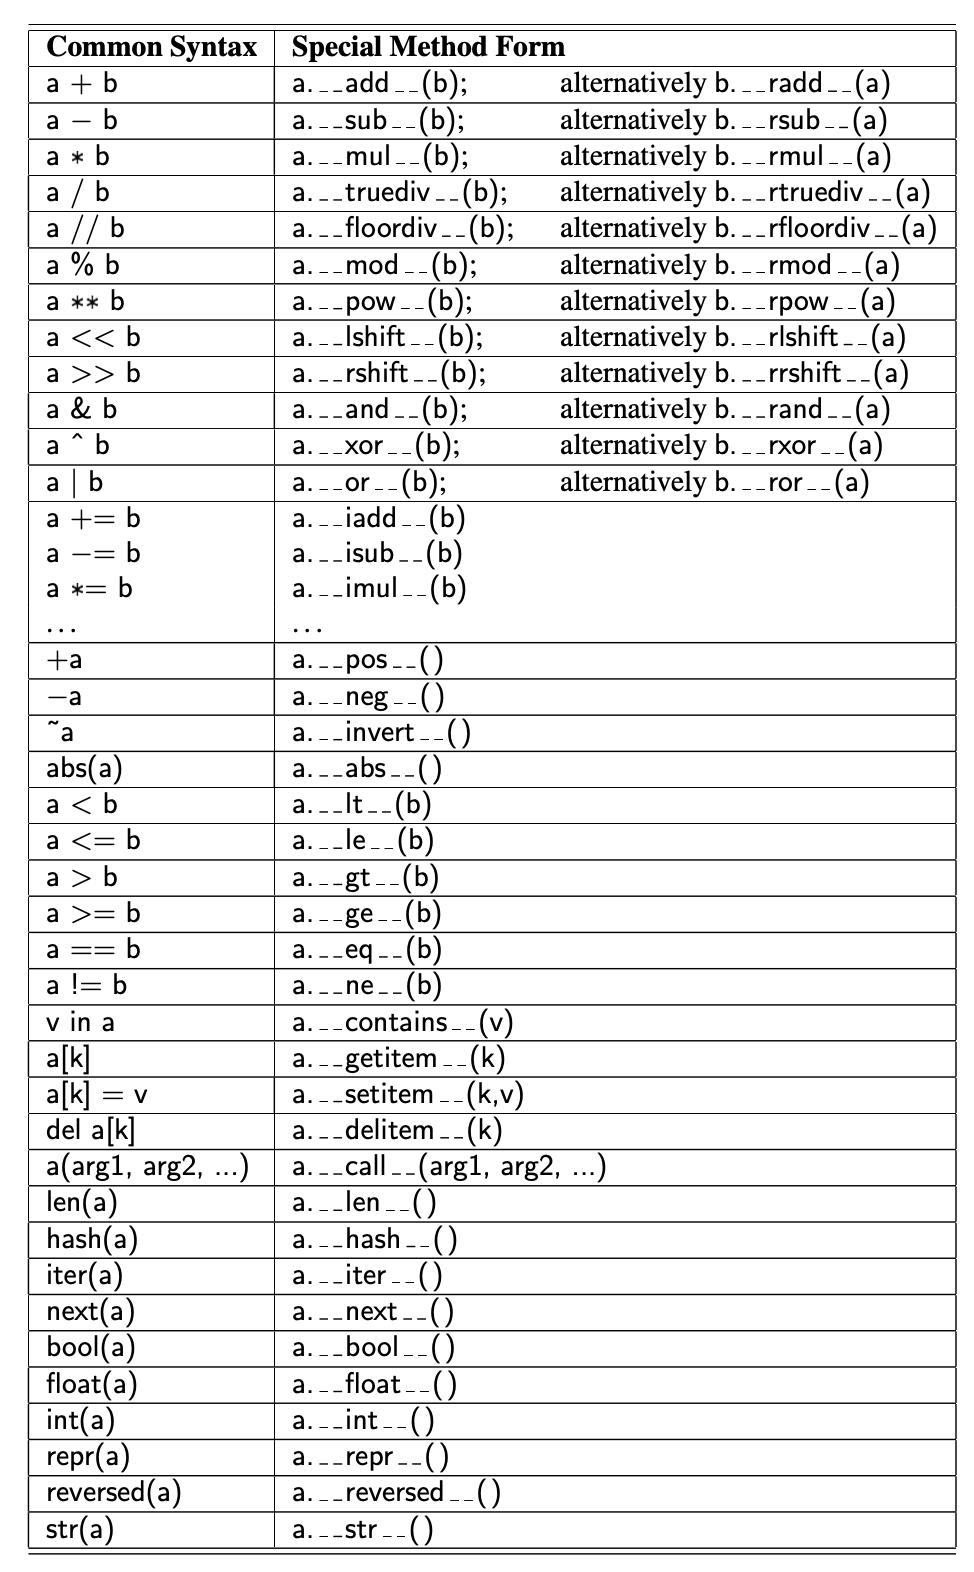

#### Implied Methods

There are some operators that have default definitions provided by Python, in the absence of special methods.
<br><br>
E.g.<br>
the \__ bool__ method, supports the syntax **if foo:**
    - has default semantics that every object other than None is evaluated as True
    - For container type, if the method \__ len__ exists, then the evaluation of bool(foo) is interpreted by default to be True for instance with nonzero length

### 3.3 Multidimensional Vector Class


In [6]:
class Vector:
    '''Represent a vector in a multidimensional space'''
    
    def __init__(self, d):
        '''Create d-dimensional vector of zeros'''
        self._coords = [0] * d
        
    def __len__(self):
        '''Return the dimension of the vector'''
        return len(self._coords)
    
    def __getitem__(self, j):
        '''Return the jth coordinate of vector'''
        return self._coords[j]
    
    def __setitem__(self, j, val):
        '''Set jth coordinate of vector to given value'''
        self._coords[j] = val
        
    def __add__(self, other):
        '''Return the sum of two vectors'''
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __eq__(self, other):
        '''Return True if vector has same coordinates as other'''
        return self._coords == other._coords
    
    def __ne__(self, other):
        return not self == other # rely on existing __eq__ definition
    
    def __str__(self):
        '''Produce string representation of vector'''
        return '<' + str(self._coords)[1:-1] + '>' # adapt list representation

In [7]:
v = Vector(5)
v[1] = 23       #based on __setitem__
v[-1] = 45
print(v[4])     #print via __getitem__
print(v)

45
<0, 23, 0, 0, 45>


In [8]:
u = v + v       # via __add__
print(u)
total = 0
for entry in v: # implicit iteration via __len__ and __getitem__
    total += entry
print(total)

<0, 46, 0, 0, 90>
68


In [9]:
# polymorphism
m = v + [5,3,10,-2,1]
print(m)

<5, 26, 10, -2, 46>


### 3.4 Iterators

Iterator supports a special method named \__ next__ that returns the next element of the collection, if any, or raise a StopIteration exception to indicate that there are no further element.
<br><br>
Python provides an automatic iterator implementation for any class that defines both \__ len__ and \__ getitem__.

In [10]:
class SequenceIterator:
    '''An iterator for any of Python sequence types 
    that supports __len__ and __getitem_-'''
    
    def __init__(self, sequence):
        '''Create an iterator for the given sequence'''
        self._seq = sequence   # keep a reference to the underlying data
        self._k = -1           # will increment to 0 on first call to next
        
    def __next__(self):
        '''Return the next element, or else raise StopIteration error'''
        self._k += 1           # advance to next index
        if self._k < len(self._seq):
            return(self._seq[self._k])  #return the data element
        else:
            raise StopIteration()
            
    def __iter__(self):
        '''By convention, an iterator must return itself as an iterator'''
        return self

### 3.5 Range Class

In [11]:
class Range:
    '''A class that mimic the built-in range class'''
    
    def __init__(self, start, stop = None, step = 1):
        if step == 0:
            raise ValueError('step cannot be 0')
        
        if stop is None:              #special case of range(n)
            start, stop = 0, start    #should be treated as range(0,n)
            
        # calculate the effective length once
        self._length = max(0,(stop - start + step - 1) // step)
        
        # knowledge of start and step to support __getitem__
        self._start = start
        self._step = step
        
    def __len__(self):
        return self._length
    
    def __getitem__(self, k):
        if k < 0:
            k += len(self)             # convert negative index
        
        if not 0 <= k < self._length:
            raise IndexError('index out of range')
        
        return self._start + k * self._step       

## 4. Inheritance

Inheritance allows a new class to be defined based upon an existing class in two ways:
1. A subclass may specialize an existing behavior by providing a new implementation that override an existing method.
2. A subclass may extend its superclass by providing brand new methods.

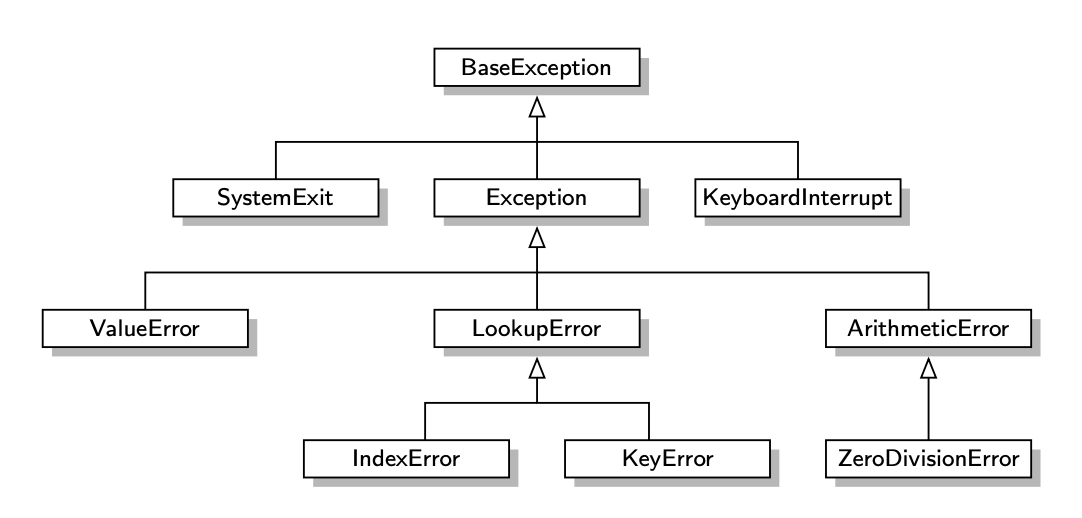

### 4.1 Extending the CreditCard Class

New class: PredatoryCreditCard. The new class will differ from the original in two ways: 
1. if an attempted charge is rejected because it would have exceeded the credit limit, a \$5 fee will be charged
    - override the charge method

2. there will be a mechanism for assessing a monthly interest charge on the outstanding balance, based upon an Annual Percentage Rate (APR) specified as a constructor parameter.
    - extend with a new method process_month
    
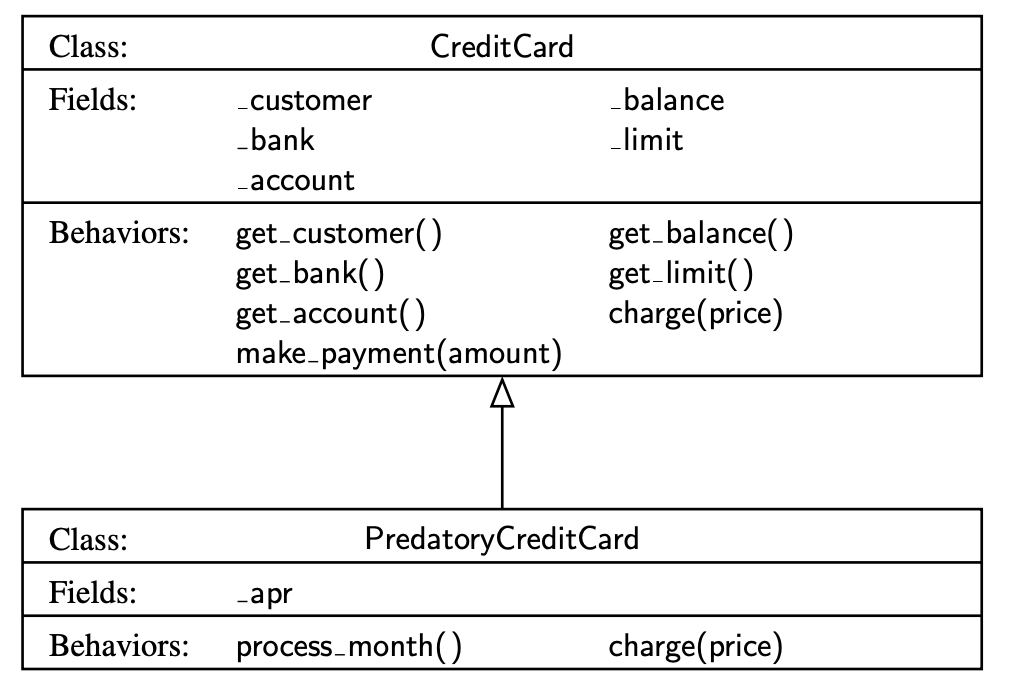

In [12]:
class PredatoryCreditCard(CreditCard):
    '''An extension to CreditCard that compounds interest and fees'''
    
    def __init__(self, customer, bank, acnt, limit, apr):
        '''
        apr     annual percentage rage(0.0825 for 8.25% APR)
        
        '''
        super().__init__(customer, bank, acnt, limit)  # call super constructor
        self._apr = apr
        
    def charge(self, price):
        '''
        Charge given price to the card, assuming sufficient credit limit
        Return True if charge was processed, 
        Return False and assess $5 fee if denied
        '''
        success = super().charge(price)   # call inherited method
        if not success:
            self._balance += 5
        return success
    
    def process_month(self):
        '''
        assessing a monthly interest charge on outstanding balance 
        '''
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1/12)
            self._balance *= monthly_factor

#### Protected Members

1. Protected Members:
    - self._balance, established by the parent CreditCard Class
    - Accessible to the subclass, not to the general public
2. Private Members:
    - Usually name as double underscore __balance
    - Not accessible to the subclass or public

### 4.2 Hierarchy of Numeric Progressions

Definitions:
1. Numeric progression:
    - A sequence of numbers where each number depends on one or more of the previous numbers.
2. Arithmetic progression：
    - Determines the next number by adding a fied constant to the previous value
3. Geometric progression:
    - Determines the ext number by multiplying the previous value by a fixed constant.
4. Fibonacci Progression:

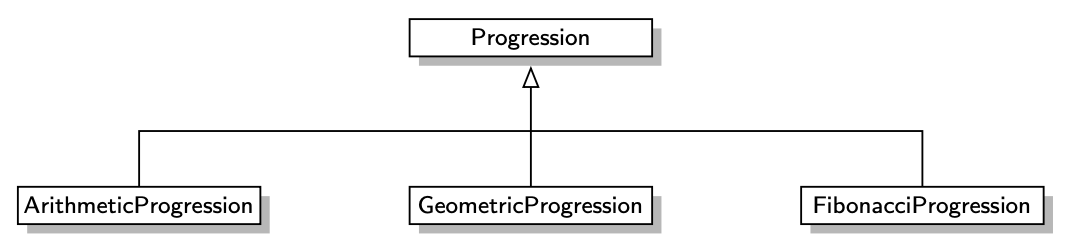

In [13]:
class Progression:
    '''Iterator producing a generic progression
    Default iterator produces the whole numbers 0,1,2
    '''
    
    def __init__(self, start=0):
        '''Initialize current to the first value of the progression'''
        self._current = start
        
    def _advance(self):
        '''Update self._current to a new value
        This should be override by a subclass to customize progression
        
        By convention, if current is set to None, this designates the end of a finite progression
        '''
        self._current +=1
        
    def __next__(self):
        '''Return the next element, or else raise StopIteration Error'''
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance()
            return answer
    
    def __iter__(self):
        '''By convention, an iterator must return itself as an iterator'''
        return self
    
    def print_progression(self, n):
        '''Print next n values of the progression'''
        print(' '.join(str(next(self)) for j in range(n)))

In [14]:
class ArithmeticProgression(Progression):
    '''Iterator producing an arithmetic progression'''
    
    def __init__(self, increment = 1, start = 0):
        super().__init__(start)
        self._increment = increment
    
    def _advance(self):
        self._current += self._increment

In [15]:
class GeometricProgression(Progression):
    
    def __init__(self, base = 2, start = 1):
        super().__init__(start)
        self._base = base
        
    def _advance(self):
        self._current *= self._base

In [16]:
class FibonacciProgression(Progression):
    
    def __init__(self, first = 0, second = 1):
        super().__init__(first)
        self._prev = second - first    # fictitious value preceding the first
        
    def _advance(self):
        self._prev, self._current = self._current, self._prev + self._current

Testing Progressions

In [17]:
#if __name__ == '__main__':
print('Default progression')
Progression().print_progression(10)

print('Arithmetic progression with increment 5')
ArithmeticProgression(5).print_progression(10)

print('Arithmetic progression with increment 5 and start 2:')
ArithmeticProgression(5,2).print_progression(10)

print('Geomeric progression with default base')
GeometricProgression().print_progression(10)

print('Geomeric progression with base 3')
GeometricProgression(3).print_progression(10)

print('Fibonacci progression with default start value')
FibonacciProgression().print_progression(10)

print('Fibonacci progression with start value 4 and 6')
FibonacciProgression(4,6).print_progression(10)

Default progression
0 1 2 3 4 5 6 7 8 9
Arithmetic progression with increment 5
0 5 10 15 20 25 30 35 40 45
Arithmetic progression with increment 5 and start 2:
2 7 12 17 22 27 32 37 42 47
Geomeric progression with default base
1 2 4 8 16 32 64 128 256 512
Geomeric progression with base 3
1 3 9 27 81 243 729 2187 6561 19683
Fibonacci progression with default start value
0 1 1 2 3 5 8 13 21 34
Fibonacci progression with start value 4 and 6
4 6 10 16 26 42 68 110 178 288


### 4.3 Abstract Base Classes

Abstract Base Class:
    - Only purpose is to serve as a base class through inheritance
    - Cannot be directly instantiated
<br>
Concrete class:

    - Can be instantiated
    
<br>

Template method pattern:
    - when an abstract base class provides concrete behaviors that rely upon calls to other abstract behaviors
    - As soon as a subclass provides definitions for the missing abstract behaviors, the inherited concrete behaviors are well defined.


#### Example: collections.Sequence

1. Defines behaviors common to Python's list, str, and tuple classes, as sequences that support element access via an integer index
2. Provides concrete implementations of methods, count, index, and \__ contains__ that can be inherited by any class that provides concrete implementations of both \__ len__ <br>and \__ getitem__

In [20]:
from abc import ABCMeta, abstractmethod

class Sequence(metaclass = ABCMeta):
    '''
    Own version of collections.Sequence abstract base class
    '''
    @abstractmethod
    def __len__(self):
        '''Return the length of the sequence'''
        
    @abstractmethod
    def __getitem__(self,j):
        '''Return the element at index j of the sequence'''
        
    def __contains__(self, val):
        '''Return True if val found in the sequence, False otherwise'''
        for j in range(len(self)):
            if self[j] == val:
                return True
        return False
    
    def index(self, val):
        '''Return leftmost index at which val is found 
        or raise ValueError'''
        for j in range(len(self)):
            if self[j] == value:
                return j
        raise ValueError('value not in sequence')
        
    def count(self, val):
        '''Return the number of elements equal to given value'''
        k = 0
        for j in range(len(self)):
            if self[j] == val:
                k += 1
        return k

1. ABCMeta class as a metaclass.
    - A metaclass provides a template for the class definition itself
    - The ABCMeta declaration assures that constructor for the class raises an error
    
2. decorator @abstractmethod
    - declares the methods to be abstract, that we do not provide an implementation within Sequence base class, but we expect any concrete subclasses to support those two methods

## 5. Namespaces and Object-Orientation

### 5.1 Instance and Class Namespaces

1. Instance namespace
    - Manages attributes specific to an individual object
2. Class namespace
    - Manage members to be shared by all instances of a class or used without reference to any particular instance
    
### 5.2 Name Resolution and Dynamic Dispatch

When the dot operator syntax is used to access an existing member, such as obj.foo, the Python interpreter begins a name resolution process:
1. The instance namespace is searched, if name is found, its associated value is used.
2. Otherwise, the class namespace
3. Checking the class namespace for each ancestor class
4. If still not found, AttributeError is raised


#### Dynamic Dispatch(Python)

Determine at run-time which implementation of a function to call based upon the type of the object which it is invoked.


#### Static Dispatch

Determine in compile-time which version of a function to call, based upon the declared type of a variable.

## 6. Shallow and Deep Copying

1. Alias

Making copy by creating alias, the two alias refence to the same object

In [21]:
warmtones = ['red','green','blue']
palette = warmtones
print(palette)

# The modification of palette will influence warmtones
palette.append('yellow')
print(palette)
print(warmtones)

['red', 'green', 'blue']
['red', 'green', 'blue', 'yellow']
['red', 'green', 'blue', 'yellow']


2. Shallow copy

By calling the list constructor, we create a new list.


But since lists are referential(stores the references of its elements, not the elements itself), the new list represents a sequence of references to the same elements as in the warmtones.

In [28]:
warmtones = ['red','green','blue']
palette = list(warmtones)
print(palette)

# Add or remove elements from palette without affecting warmtones
palette.append('yellow')
print(palette)
print(warmtones)

# Edit color instance from palette, will change the content of warmtones

['red', 'green', 'blue']
['red', 'green', 'blue', 'yellow']
['red', 'green', 'blue']


3. Deep copy

The new copy references its own copies of those objects referenced by the original version.

In [29]:
# using copy module to create both shallow copies and deep copies

# shallow copy: copy.copy(warmtones)

# deep copy: copy.deepcopy(warmtones)